In [187]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.show()

In [142]:
CSV = 'Ej_F - energiaMensual.csv'
df=pd.read_csv('Ej_F - energiaMensual.csv',header=None)
df.head()

,0,1,2,3,4
0,2011,1,1,0.0,0.000000
1,2011,1,5,114.1,9.088013
2,2011,1,4,0.1,0.636943
3,2011,1,3,6.9,7.076923
4,2011,1,6,0.0,0.000000


In [143]:
df.columns=['Year','Month','Type','Power','Power%']

,Year,Month,Type,Power,Power%
0,2011,1,1,0.0,0.000000
1,2011,1,5,114.1,9.088013
2,2011,1,4,0.1,0.636943
3,2011,1,3,6.9,7.076923
4,2011,1,6,0.0,0.000000


In [144]:
types=df['Type'].unique()
types.sort()
print(types)

[1 2 3 4 5 6]


In [145]:
Data={}
for i in types:
    Data[i]=df[df.Type==i].drop('Type',axis=1)
    print(Data[i].shape)

(116, 4)
(100, 4)
(116, 4)
(116, 4)
(116, 4)
(116, 4)


Aca se ve que no todas las matrices son iguales. Hay meses en los que la fuente #2 no tuvo entries.

In [146]:
for i in Data:
    Data[i].set_index(['Year','Month'],inplace=True)

In [177]:
Data[1].head(10)

Power     Power%
Year Month                  
2011 1        0.0   0.000000
     2        0.0   0.000000
     3        0.0   0.000000
     4        0.0   0.000000
     5        5.5  16.871166
     6        6.3  19.325153
     7       12.5  38.343558
     8        6.8  20.858896
     9        0.6   1.840491
     10       0.9   2.760736

In [159]:
for i in Data:
    Data[i]=Data[i].reindex_like(Data[1],copy=False)
    Data[i].fillna(0,inplace=True)

In [162]:
Data[2]

Power     Power%
Year Month                  
2011 1        0.0   0.000000
     2        0.0   0.000000
     3        0.0   0.000000
     4        0.0   0.000000
     5        0.0   0.000000
...           ...        ...
2020 4       23.8  11.959799
     5       26.1  13.115578
     6       26.2  13.165829
     7       27.9  14.020101
     8       27.4  13.768844

[116 rows x 2 columns]

In [196]:
 for i in types:
        Data[i].columns=['Energia[GWh]','Energia[%]']

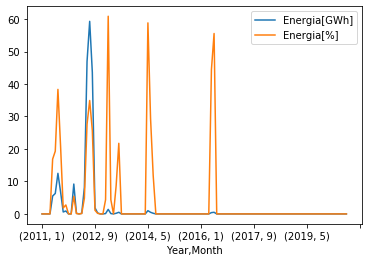

In [197]:
Data[1].plot()

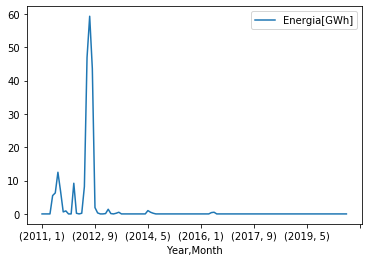

In [199]:
Data[1].plot(y='Energia[GWh]',kind='line')

In [202]:
for i in types:
    Data[i].to_csv("Energia_fuente_"+str(i)+".csv")

In [203]:
Energias=Data[1]['Energia[GWh]']

In [206]:
types[1:]

array([2, 3, 4, 5, 6], dtype=int64)

In [209]:
for i in types[1:]:
    Energias.append(Data[i]['Energia[GWh]'])

In [210]:
Energias

Year  Month
2011  1        0.0
      2        0.0
      3        0.0
      4        0.0
      5        5.5
              ... 
2020  4        0.0
      5        0.0
      6        0.0
      7        0.0
      8        0.0
Name: Energia[GWh], Length: 116, dtype: float64

In [221]:
pd.concat([Data[1],Data[2]],axis=1)

Energia[GWh]  Energia[%]  Energia[GWh]  Energia[%]
Year Month                                                    
2011 1               0.0    0.000000           0.0    0.000000
     2               0.0    0.000000           0.0    0.000000
     3               0.0    0.000000           0.0    0.000000
     4               0.0    0.000000           0.0    0.000000
     5               5.5   16.871166           0.0    0.000000
...                  ...         ...           ...         ...
2020 4               0.0    0.000000          23.8   11.959799
     5               0.0    0.000000          26.1   13.115578
     6               0.0    0.000000          26.2   13.165829
     7               0.0    0.000000          27.9   14.020101
     8               0.0    0.000000          27.4   13.768844

[116 rows x 4 columns]

In [217]:
cat(E1,E2,E3,E4,E5,E6)

NameError: name 'cat' is not defined